# Analysis of the vocabulary for the online experiment

Unless otherwise stated, the vocabulary we analyse here is the whole set of candidate words for the online experiment: nouns or proper nouns whose level of acquisition was identifiable and which were not deemed meta-mathematical or too polysemic.

The final vocabulary for this experiment is only a subset of these words, as we excluded some pairs in order to control the distribution of estimated similarities of pairs within each level.

## Loading data

In [1]:
import warnings
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter('ignore', FutureWarning)

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import ast

In [3]:
plt.style.use('ggplot')
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [4]:
df = pd.read_csv('../Data/finalVocab_English_preprocessed.csv', encoding='utf-8', index_col='Possible English Translation', dtype={'Level': int, 'metaMaths': bool, 'Polysemic': bool, 'Raw Math Freq': float, 'Raw Nonmath Freq': float}, converters={'Grammatical Category': (lambda x: ast.literal_eval(x))})

In [5]:
orderedLevelNames = ['primary', '6-7th grade', '8-9th grade', '10th grade', '11-12th grade', 'bachelor', 'licence', 'master']

In [6]:
df

,Log Math Freq,Log Nonmath Freq,Raw Math Freq,Raw Nonmath Freq,Level,Level Name,metaMaths,Polysemic,Grammatical Category,Behavioral judgements available?,Used in basic fMRI vocabulary,Mean Knowledge Rating,STD of KnowledgeRating,IRT Discrimination Parameter,IRT Difficulty Parameter,Logit Regression Discrimination Parameter,Logit Regression Difficulty Parameter,Possible English Translation.1,Present in the English Vocabulary?
Possible English Translation,,,,,,,,,,,,,,,,,,,
one,4.448928,4.265072,0.028114,0.018411,0,primary,False,False,[nombre],True,NaN,7.739130,0.673562,NaN,NaN,NaN,NaN,one,True
number,3.514687,2.451814,0.003271,0.000283,0,primary,False,False,[nom],True,NaN,7.612403,0.874355,NaN,NaN,NaN,NaN,number,True
$\mathbb{N}$,3.430420,3.001920,0.002694,0.001004,3,10th grade,False,False,[symbole],True,NaN,7.356164,1.412952,2.268333,-2.596552,1.462667,0.804193,$\mathbb{N}$,True
two,3.378996,3.150847,0.002393,0.001415,0,primary,False,False,[nombre],True,NaN,7.746835,0.986855,1.785634,-3.113349,0.938668,-0.611375,two,True
function,3.375763,2.253073,0.002376,0.000179,2,8-9th grade,False,False,[nom],True,NaN,7.500000,0.909353,NaN,NaN,NaN,NaN,function,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
codimension,0.971355,-12.000000,0.000009,0.000000,5,bachelor,False,False,[nom],True,NaN,3.979310,2.937202,2.507900,-0.275934,0.555499,5.026172,codimension,True
recursion,0.946325,-12.000000,0.000009,0.000000,4,11-12th grade,False,False,[nom],True,NaN,5.668966,2.597227,2.614943,-1.304898,0.657436,2.499340,recursion,True
hypergraph,0.927524,-12.000000,0.000008,0.000000,5,bachelor,False,False,[nom],True,NaN,2.807453,2.523223,1.473771,0.105144,0.227454,7.048114,hypergraph,True


In [7]:
df.loc['one']['Grammatical Category']

['nombre']

## Number of words by level

In [8]:
df.groupby('Level Name').size()

Level Name
10th grade       27
11-12th grade    36
6-7th grade      35
8-9th grade      13
bachelor         68
licence          33
master           10
primary          74
dtype: int64

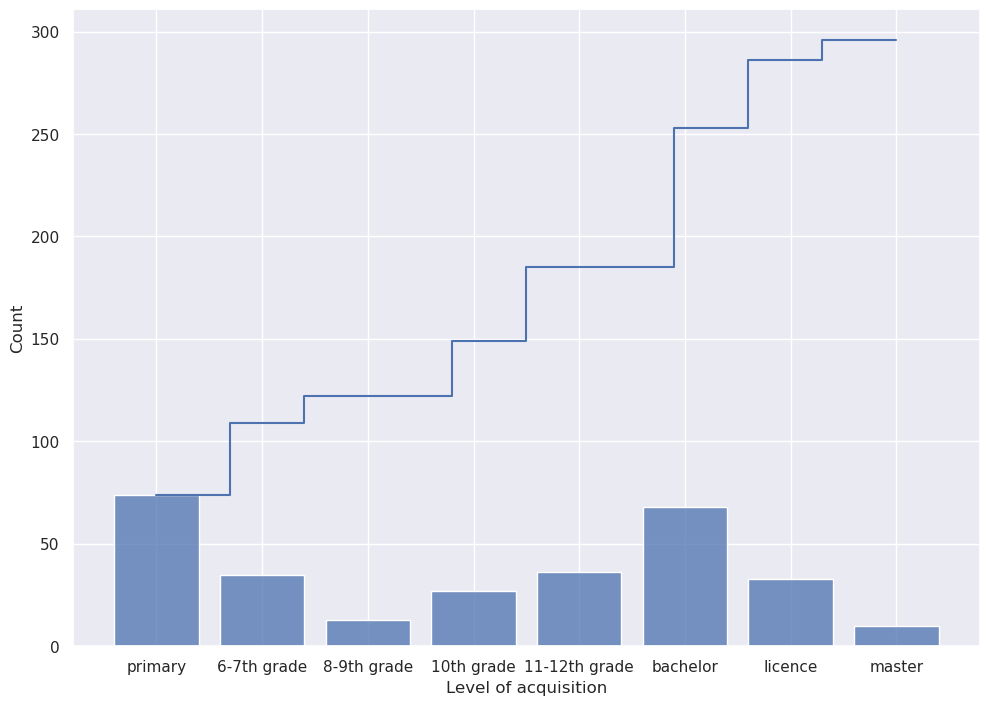

In [9]:
sns.histplot(data=df, x='Level', discrete=True, shrink=.8)
sns.histplot(data=df, x='Level', cumulative=True, fill=False, element='step')
plt.xticks(ticks=np.arange(8), labels=orderedLevelNames)
plt.xlabel('Level of acquisition')
plt.show()

## Word length analysis

In [10]:
def wordLength(w):
    if w[0] == '$':
        return 1
    return len(w)

df['wordLength'] = [wordLength(x) for x in df.index]

### ANOVA

In [11]:
model = ols('wordLength ~ C(Level)', data=df)
results = model.fit()
anova = sm.stats.anova_lm(results, typ=2)
anova

,sum_sq,df,F,PR(>F)
C(Level),213.580699,7.0,4.489741,0.000092
Residual,1957.199707,288.0,NaN,NaN


### Plots

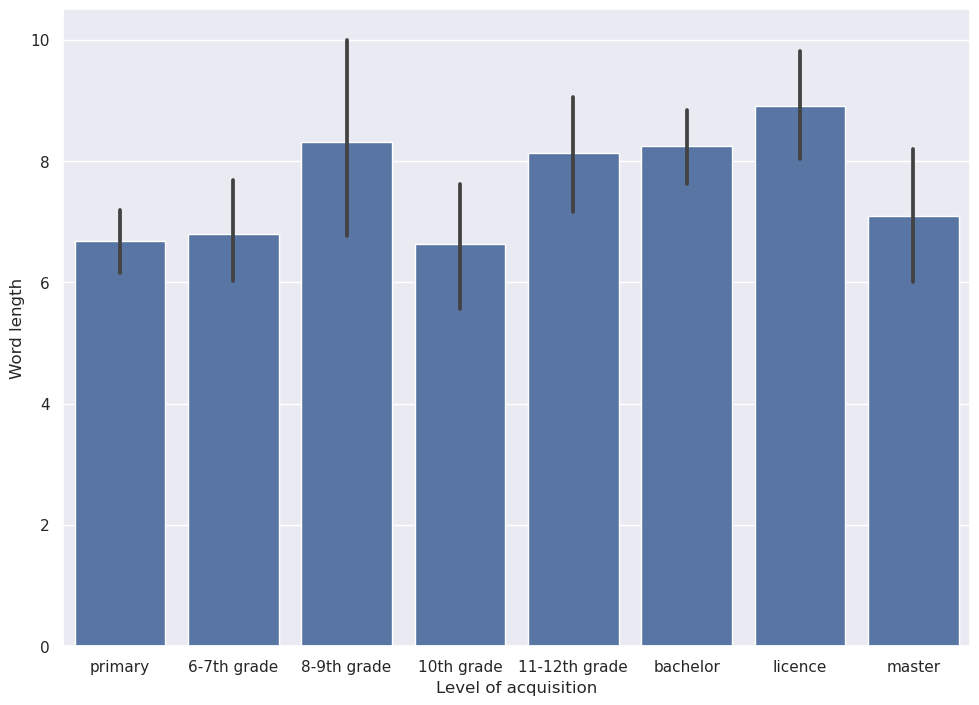

In [12]:
sns.barplot(data=df, x='Level', y='wordLength', color=sns.color_palette()[0])
plt.xticks(ticks=np.arange(8), labels=orderedLevelNames)
plt.xlabel('Level of acquisition')
plt.ylabel('Word length')
plt.show()

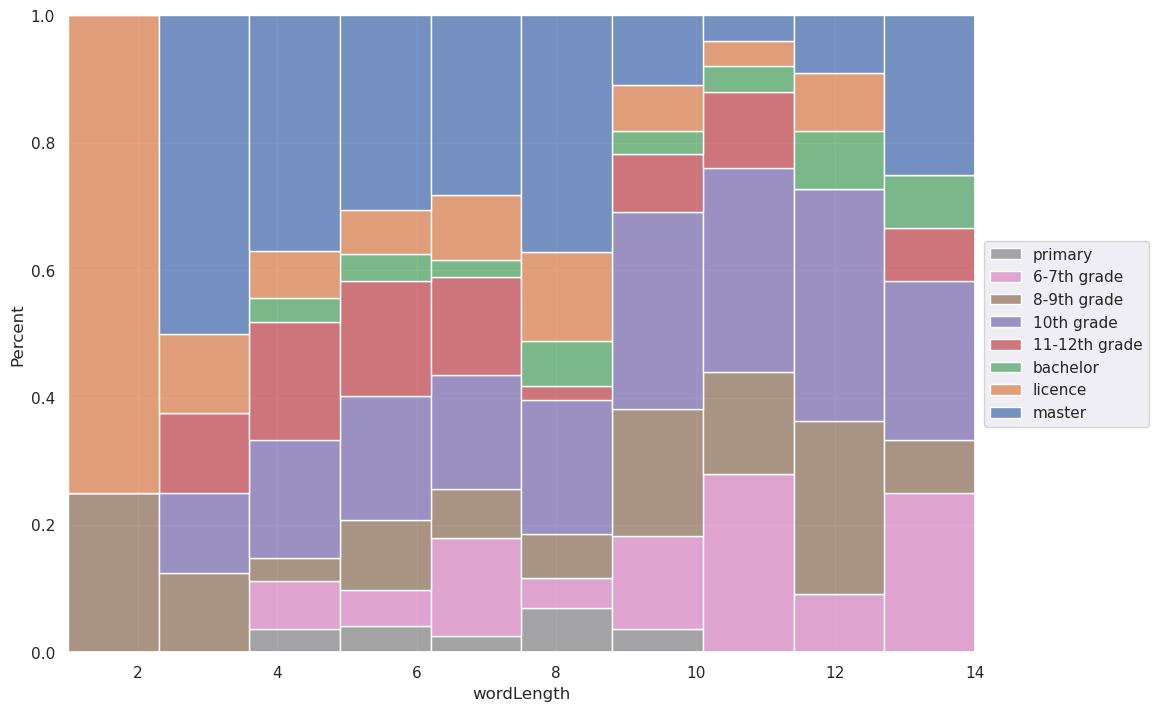

In [13]:
sns.histplot(data=df, x='wordLength', hue='Level Name', multiple='fill', stat='percent')
plt.legend(orderedLevelNames, loc='center right', bbox_to_anchor=(1.2, 0.5))
plt.show()

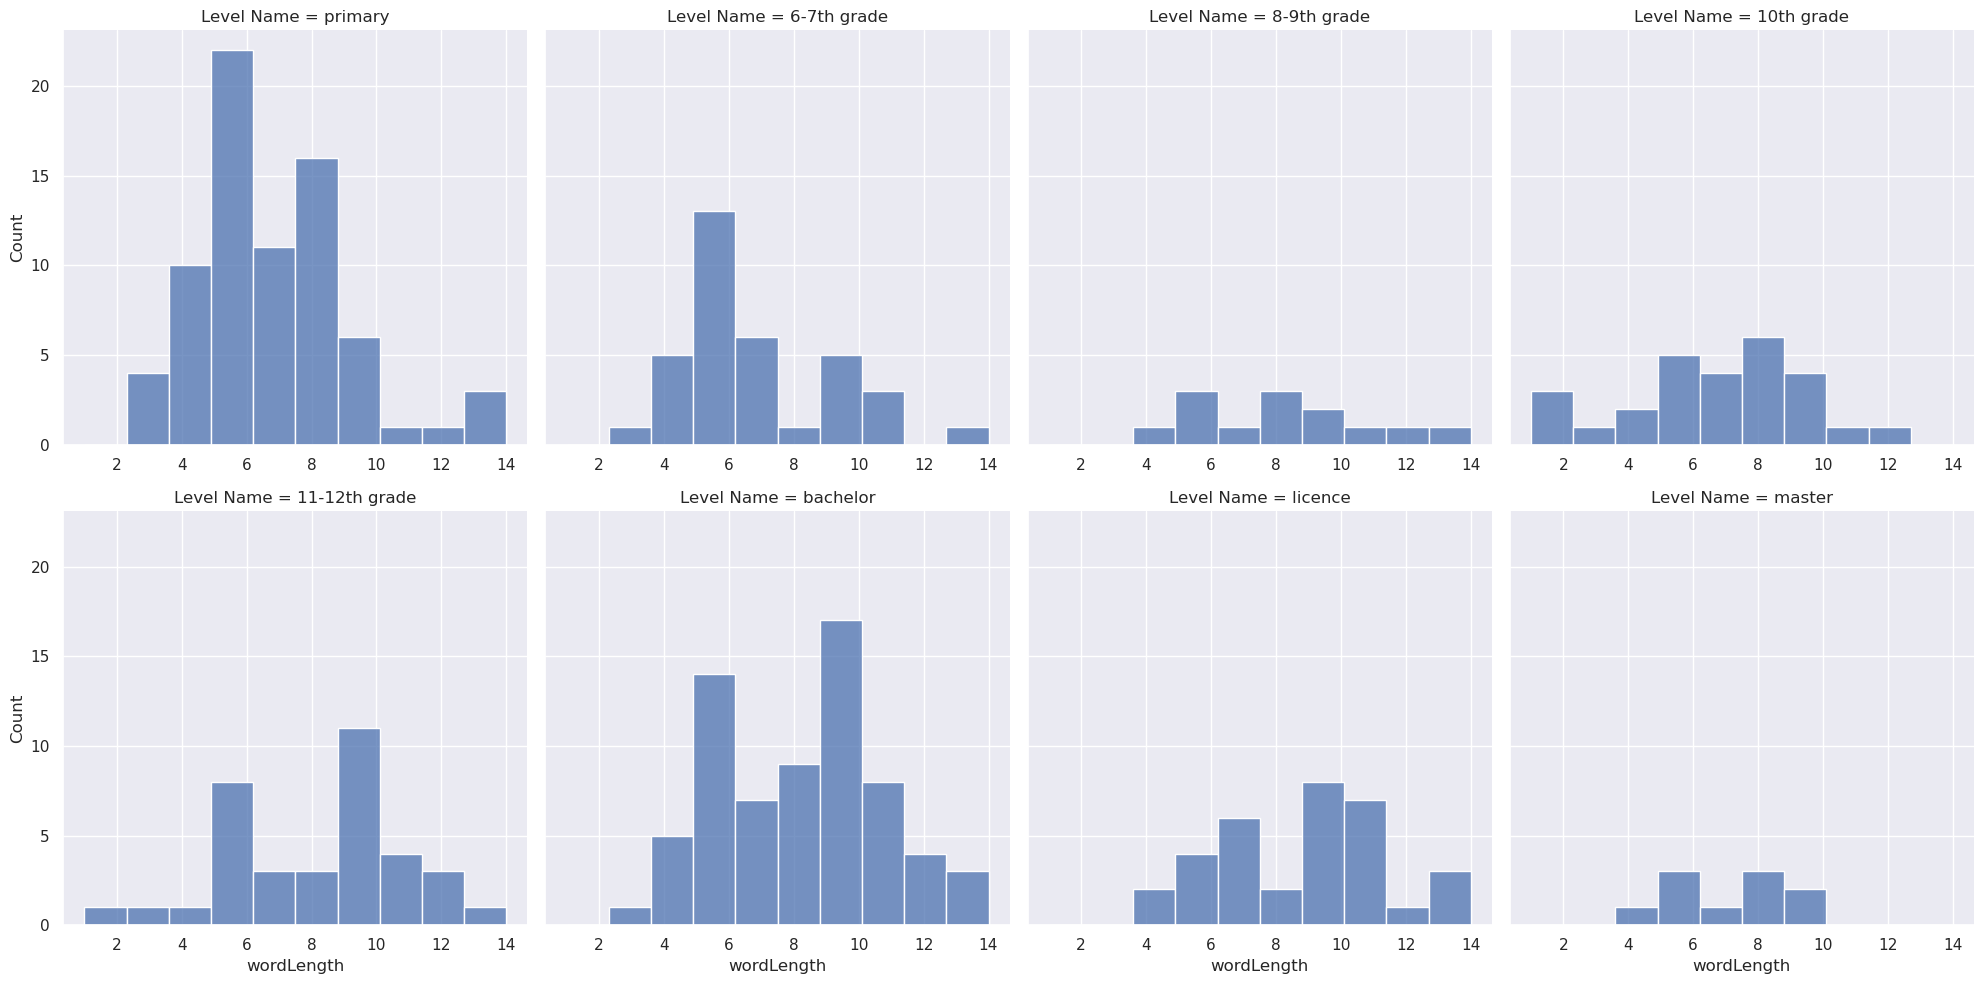

In [14]:
sns.displot(data=df, x='wordLength', kind='hist', col='Level Name', col_order=orderedLevelNames, col_wrap=4, facet_kws={'sharex':False})
plt.show()

## Word frequency analysis

In [15]:
df["relativeFrequency"] = [x[1] - x[2] for x in df.itertuples()]

### ANOVA

We are looking for two kinds of effects:
* first we want to see if the mathematical frequency or words is significantly different accross levels of education
* second we want to see if the relative frequency of words is significantly different accross levels of education (that is, if at some levels words are much more mathematically tuned than at others)

In [16]:
model = ols('Q("Log Math Freq") ~ C(Level)', data=df)
results = model.fit()
anova = sm.stats.anova_lm(results, typ=2)
anova

,sum_sq,df,F,PR(>F)
C(Level),20.668954,7.0,11.777054,3.463562e-13
Residual,72.206497,288.0,NaN,NaN


In [17]:
model = ols('relativeFrequency ~ C(Level)', data=df)
results = model.fit()
anova = sm.stats.anova_lm(results, typ=2)
anova

,sum_sq,df,F,PR(>F)
C(Level),1171.601652,7.0,7.576203,2.175465e-08
Residual,6362.427374,288.0,NaN,NaN


### Plots

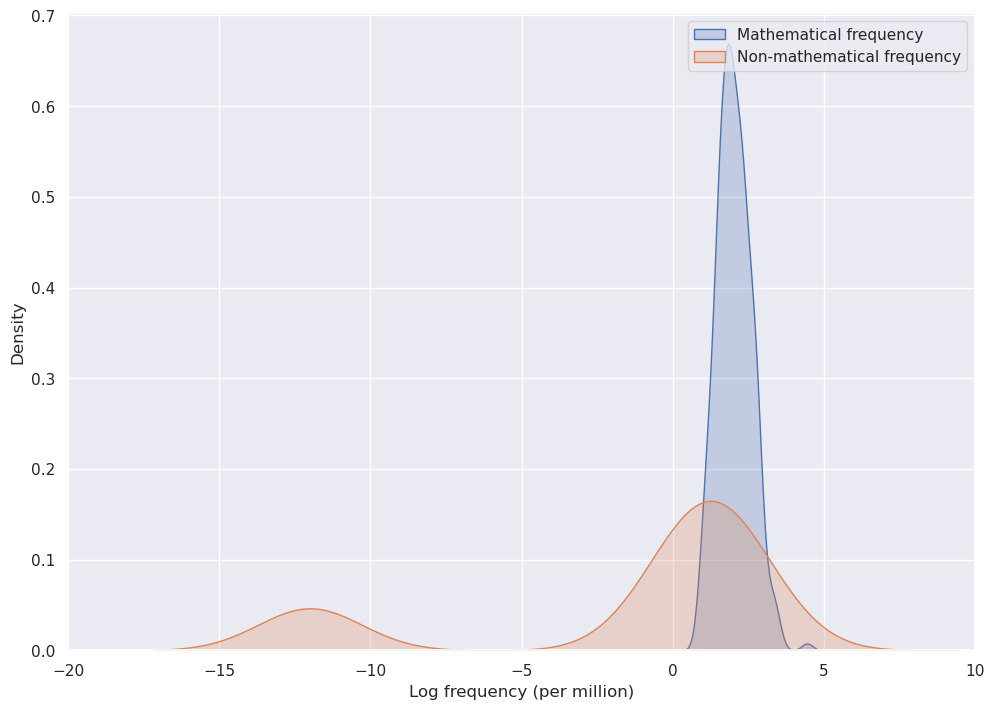

In [18]:
sns.kdeplot(data=df, x='Log Math Freq', fill=True, label='Mathematical frequency')
sns.kdeplot(data=df, x='Log Nonmath Freq', fill=True, label='Non-mathematical frequency')
plt.xlim([-20,10])
plt.xlabel('Log frequency (per million)')
plt.legend()
plt.show()

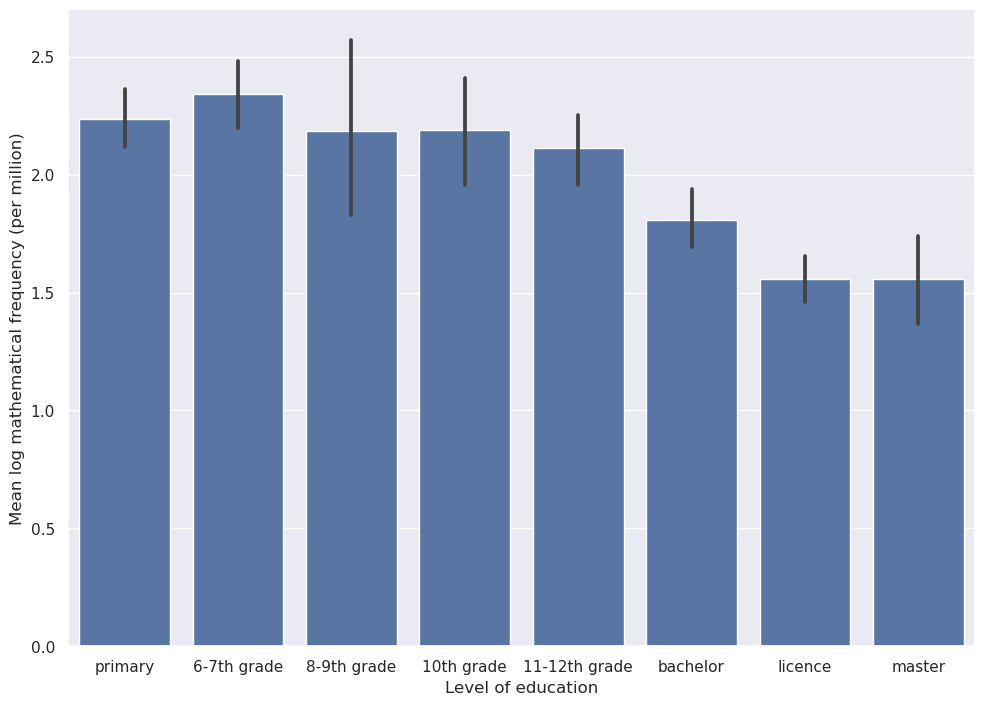

In [19]:
sns.barplot(data=df, x='Level', y='Log Math Freq', color=sns.color_palette()[0])
plt.xticks(np.arange(8), orderedLevelNames)
plt.xlabel('Level of education')
plt.ylabel('Mean log mathematical frequency (per million)')
plt.show()

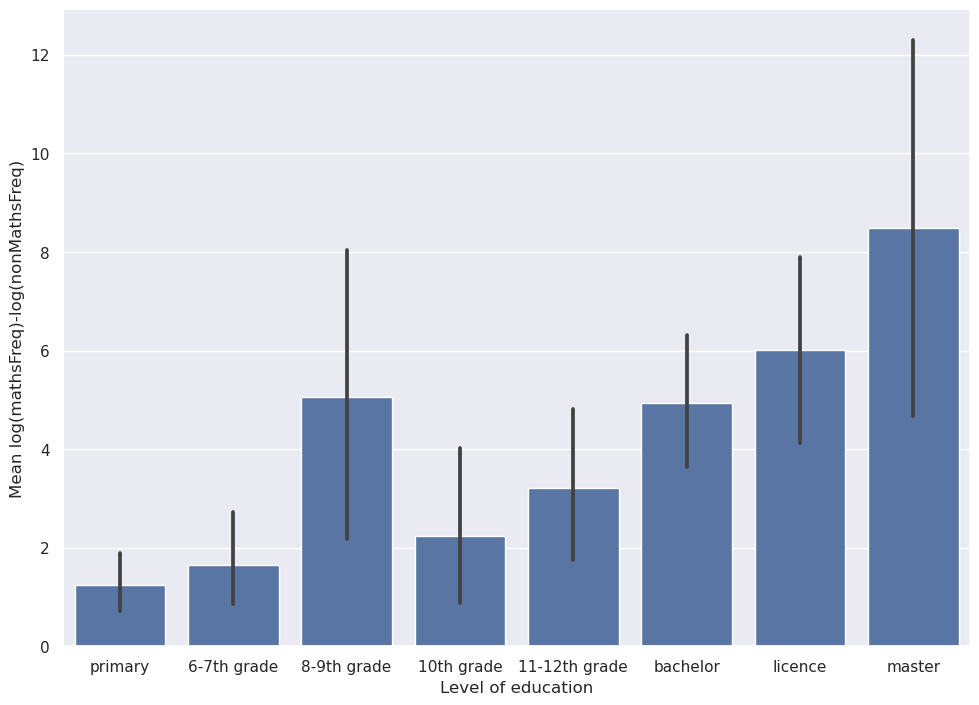

In [20]:
sns.barplot(data=df, x='Level', y='relativeFrequency', color=sns.color_palette()[0])
plt.xticks(np.arange(8), orderedLevelNames)
plt.xlabel('Level of education')
plt.ylabel('Mean log(mathsFreq)-log(nonMathsFreq)')
plt.show()

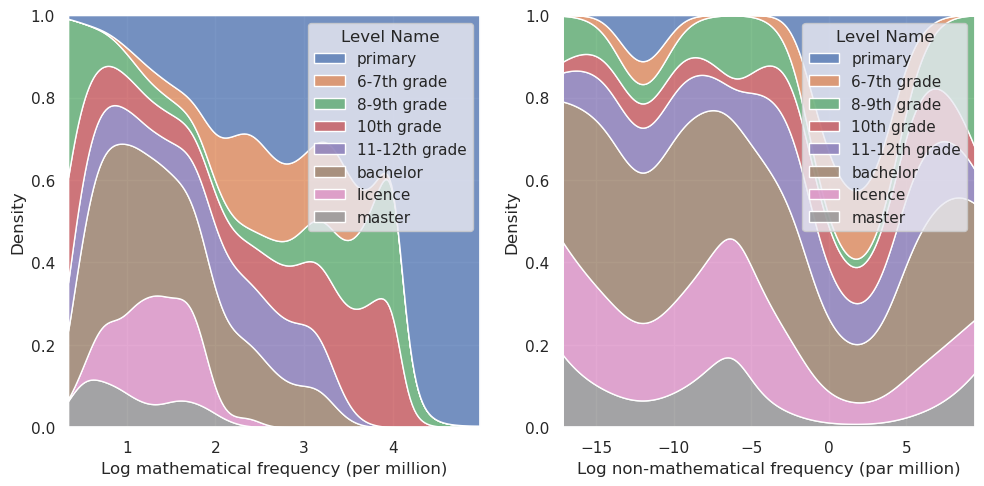

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2)
sns.kdeplot(data=df, x='Log Math Freq', hue='Level Name', hue_order=orderedLevelNames, multiple="fill", ax=ax1)
sns.kdeplot(data=df, x='Log Nonmath Freq', hue='Level Name', hue_order=orderedLevelNames, multiple="fill", ax=ax2)
ax1.set_box_aspect(1)
ax2.set_box_aspect(1)
ax1.set_xlabel('Log mathematical frequency (per million)')
ax2.set_xlabel('Log non-mathematical frequency (par million)')
#ax1.set_xlim([np.min(df["Log Math Freq"]),np.max(df["Log Math Freq"])])
#ax2.set_xlim([np.min(df["Log Nonmath Freq"]),np.max(df["Log Nonmath Freq"])])
plt.show()

## Similarity matrix for numbers

In [22]:
allPairs = pd.read_csv('../OnlineExperiment/English/resources/pairSim_English.csv', encoding='utf-8', dtype={'Similarity': float})

In [23]:
halfNumbers = allPairs.loc[allPairs.word1.apply(lambda x: 'nombre' in df.loc[x]["Grammatical Category"]) & allPairs.word2.apply(lambda x: 'nombre' in df.loc[x]["Grammatical Category"])].copy()
w1, w2, sim = list(halfNumbers.word1), list(halfNumbers.word2), list(halfNumbers.Similarity)
numbers = pd.DataFrame(np.transpose(np.array([w1+w2, w2+w1, sim*2])), columns=['word1', 'word2', 'Similarity'])
numbers = numbers.astype({"Similarity": float})
numbersPivot = pd.pivot_table(numbers, index='word1', columns='word2', values='Similarity', fill_value=1)

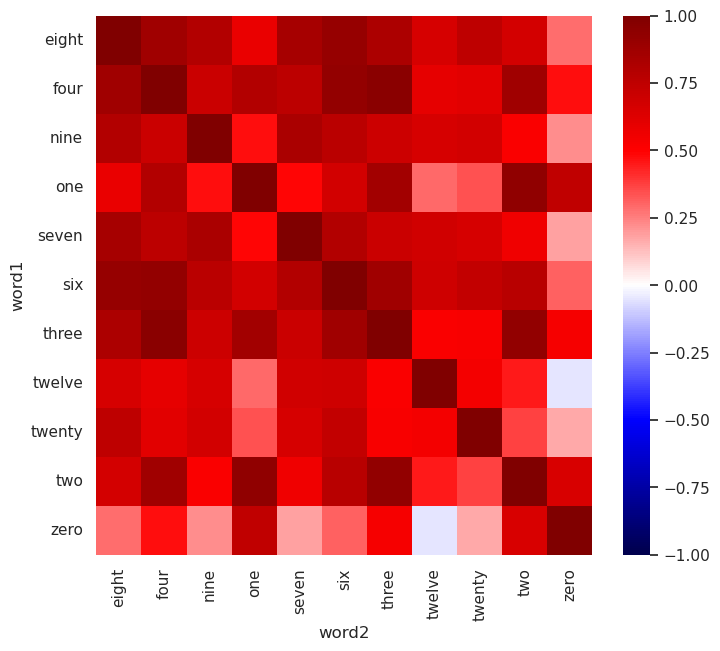

<Figure size 1170x827 with 0 Axes>

In [24]:
fig = plt.figure(figsize=(8, 7))
sns.heatmap(numbersPivot, vmin=-1, vmax=1, cmap="seismic")
plt.show()
plt.clf()

## Distribution of similarity in selected pairs 

In this part, we only analyse the pairs selected for the online experiment.

In [25]:
selectedPairsList = [pd.read_csv(f'../Data/EnglishPairs/selectedPairs_{level}.csv', encoding='utf-8', dtype={'Similarity': float}) for level in [0,2,4,5,7]]
selectedPairs = pd.concat(selectedPairsList)

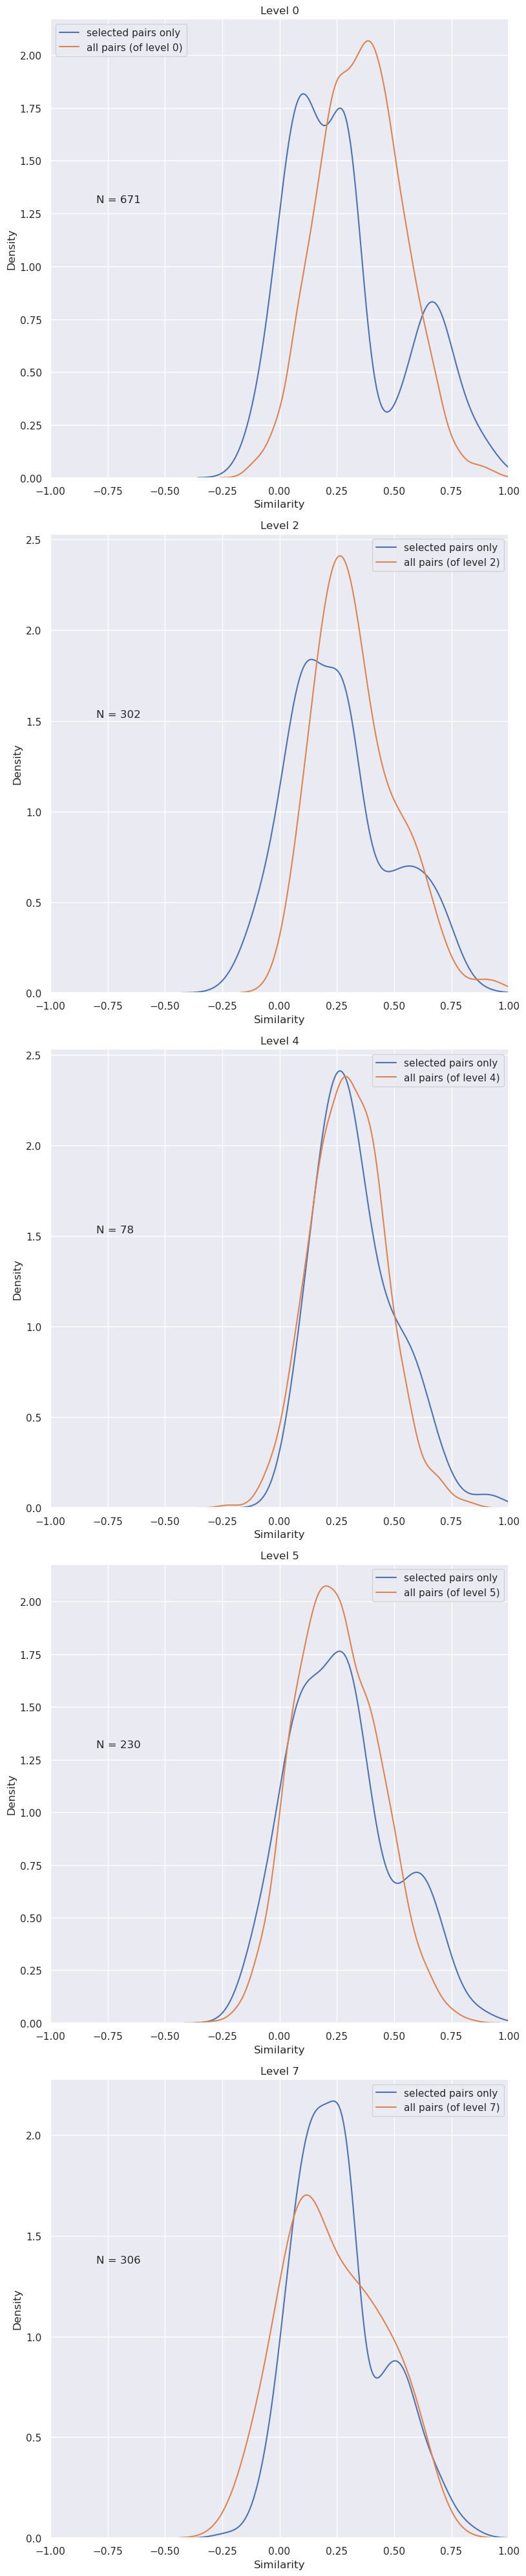

In [26]:
sns.set(rc={'figure.figsize':(40,40)})
fig, ax = plt.subplots(5, 1)
for i, level in zip(range(5), [0,2,4,5,7]):
    selectedLevelPairs = selectedPairs.loc[selectedPairs.Level == i]
    allLevelPairs = allPairs.loc[allPairs.Level == level]
    sns.kdeplot(data=selectedLevelPairs, x='Similarity', label='selected pairs only', ax=ax[i], color=sns.color_palette()[0])
    sns.kdeplot(data=allLevelPairs, x='Similarity', label=f'all pairs (of level {level})', ax=ax[i], color=sns.color_palette()[1])
    ax[i].text(.1, .6, f"N = {len(selectedLevelPairs)}", transform=ax[i].transAxes)
    ax[i].set_xlim([-1,1])
    ax[i].set_title(f'Level {level}')
    ax[i].set_box_aspect(1)
    ax[i].legend()
    plt.tight_layout()
plt.show()